In [18]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Updated 3 November 2022

Authors : Felix Michaud and Sylvain Haupert

"""

import shutil
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
plt.close("all")

# notebook display
from IPython.display import clear_output # to clear output of jupyter cell

# import the package bambird
import bambird
import bambird.config as cfg

In [62]:

# %%
# Define constants
# ----------------

# Temporary saved directory
TEMP_DIR        = "./build_dataset_temp"
DATASET_NAME    = Path('WORKFLOW_MULTIPLE_SPECIES')
ROIS_NAME       = Path(str(DATASET_NAME) +'_ROIS')

# List of species to build a clean dataset
SCIENTIC_NAME_LIST = [ 
                        "Columba palumbus",
                        # "Regulus regulus",
                        "Phylloscopus collybita",
                        # "Anthus triviali", 
                        "Fringilla coelebs", 
                        # "Troglodytes troglodytes", 
                        # "Phoenicurus phoenicurus", 
                        # "Strix aluco", 
                        # "Aegithalos caudatus",
                    ]

# CONFIG_FILE = '../src/bambird/config_default.yaml' 
CONFIG_FILE = '../src/bambird/config_default_birdnet.yaml' 

# After the process, remove the audio that were saved during the process ?
CLEAN = False

# Load the configuration file    
params = cfg.load_config(CONFIG_FILE)


use the function <bambird.extract_rois_full_sig> to segment ROIS


In [12]:
#%%    
# Query Xeno-Canto
# ----------------
df_dataset = bambird.query_xc(
                    species_list    = SCIENTIC_NAME_LIST,
                    params          = params['PARAMS_XC'],
                    random_seed     = params['RANDOM_SEED'],
                    verbose         = True
                    )

Loading page 1...
https://www.xeno-canto.org/api/2/recordings?query=Columba%20palumbus%20len:20-60%20q:"A"%20type:song&page=1
Found 1 pages in total.
Saved metadata for 20 files
Loading page 1...
https://www.xeno-canto.org/api/2/recordings?query=Phylloscopus%20collybita%20len:20-60%20q:"A"%20type:song&page=1
Found 1 pages in total.
Saved metadata for 20 files
Loading page 1...
https://www.xeno-canto.org/api/2/recordings?query=Fringilla%20coelebs%20len:20-60%20q:"A"%20type:song&page=1
Loading page 2...
https://www.xeno-canto.org/api/2/recordings?query=Fringilla%20coelebs%20len:20-60%20q:"A"%20type:song&page=2
Found 2 pages in total.
Saved metadata for 20 files


In [13]:
# Download audio Xeno-Canto
# -------------------------
df_xc, csv_xc  = bambird.download_xc (
                    df_dataset      = df_dataset,
                    rootdir         = TEMP_DIR, 
                    dataset_name    = DATASET_NAME, 
                    csv_filename    = params['PARAMS_XC']['CSV_XC_FILE'],
                    overwrite       = True,
                    verbose         = True
                    )

The directory build_dataset_temp/WORKFLOW_MULTIPLE_SPECIES already exists and will be overwritten
A total of 60 files will be downloaded
XC487835.mp3 already exists
XC655097.mp3 already exists
XC791136.mp3 already exists
XC653672.mp3 already exists
XC805780.mp3 already exists
XC733752.mp3 already exists
XC643547.mp3 already exists
XC552810.mp3 already exists
XC410908.mp3 already exists
XC792288.mp3 already exists
XC719579.mp3 already exists
XC512606.mp3 already exists
XC791659.mp3 already exists
XC744882.mp3 already exists
XC812328.mp3 already exists
XC781832.mp3 already exists
XC665444.mp3 already exists
XC449639.mp3 already exists
XC725799.mp3 already exists
XC228541.mp3 already exists
XC177825.mp3 already exists
XC232808.mp3 already exists
XC468487.mp3 already exists
XC717598.mp3 already exists
XC800944.mp3 already exists
XC120470.mp3 already exists
XC552656.mp3 already exists
XC795707.mp3 already exists
XC666837.mp3 already exists
XC174637.mp3 already exists
XC684578.mp3 already ex

In [14]:
# Extract ROIS
# -------------------------------

# ROIS extraction of the full dataset
df_rois, csv_rois = bambird.multicpu_extract_rois(
                    dataset     = df_xc,
                    params      = params['PARAMS_EXTRACT'],
                    save_path   = TEMP_DIR / ROIS_NAME,
                    overwrite   = True,
                    verbose     = True
                    )



======================= EXTRACT ROIS =========================

The directory build_dataset_temp/WORKFLOW_MULTIPLE_SPECIES_ROIS already exists and will be overwritten
60 new files will be processed
No audio file needs to be segmented
>>> EXTRACTION PROCESS ABORTED <<<


In [15]:
# Compute features for each ROIS
# -------------------------------
    
# Test if at least 1 ROI was found     
if len(df_rois) > 0 :    
    clear_output(wait=True)
    # compute the features on the full dataset       
    df_features, csv_features = bambird.multicpu_compute_features(
                    dataset     = df_rois,
                    params      = params['PARAMS_FEATURES'],
                    save_path   = TEMP_DIR / ROIS_NAME,
                    overwrite   = True,
                    verbose     = True)
    



====================== COMPUTE FEATURES ======================



Features already computed for 1636 audio files
No feature needs to be computed
>>> FEATURES COMPUTING PROCESS ABORTED <<<




====================== CLUSTER FEATURES ======================

METHOD_REDUCTION is empty => No dimension reduction before clustering
EPS is 0.1
HDBSCAN eps 0.1; min_samples 35; min core samples 10; Number of soundtypes found for colpal : 3; 87.16502115655854% are clustered
METHOD_REDUCTION is empty => No dimension reduction before clustering
EPS is 0.1
HDBSCAN eps 0.1; min_samples 29; min core samples 10; Number of soundtypes found for fricoe : 3; 97.29272419627749% are clustered
METHOD_REDUCTION is empty => No dimension reduction before clustering
EPS is 0.1
HDBSCAN eps 0.1; min_samples 16; min core samples 10; Number of soundtypes found for phycol : 3; 89.58333333333334% are clustered


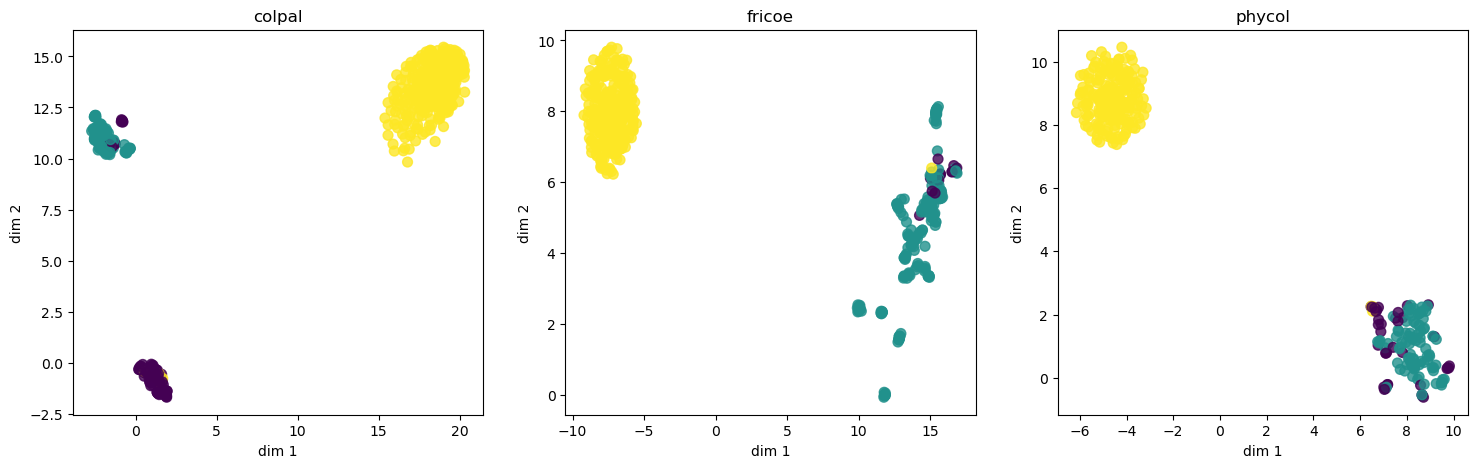

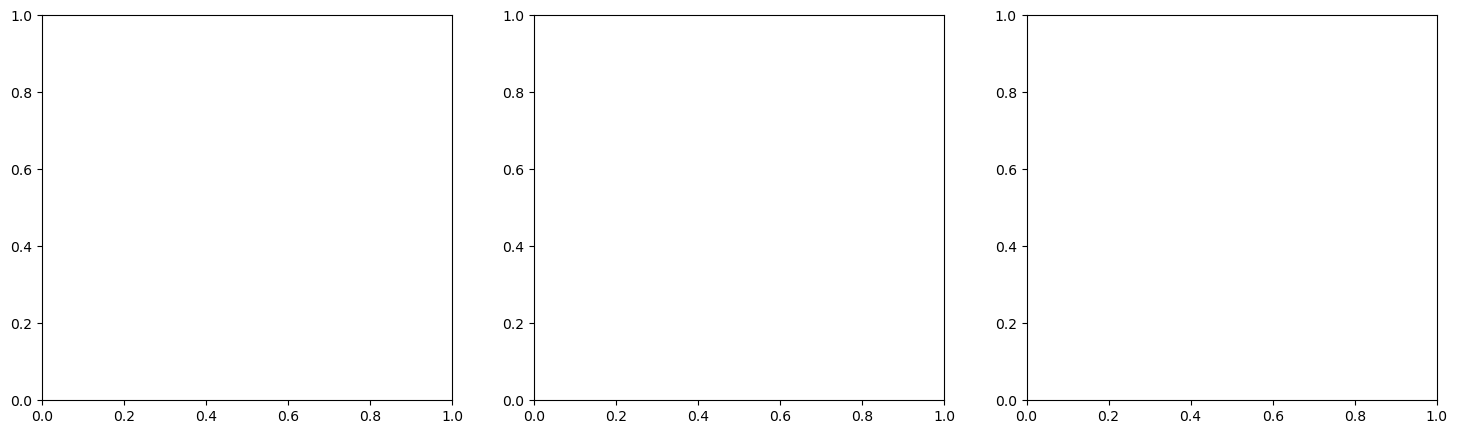

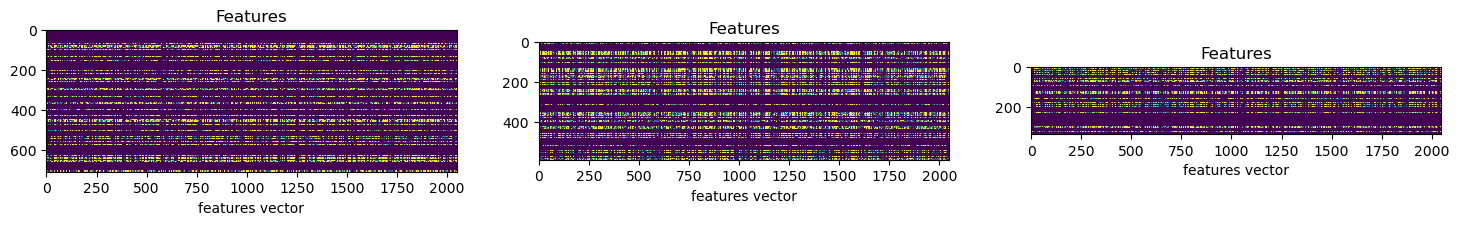

In [63]:
#  Cluster ROIS
# -------------------------------

# with dataframe or csv file
dataset = df_features 

try : 
    df_cluster, csv_clusters = bambird.find_cluster(
                    dataset = dataset,
                    params  = params['PARAMS_CLUSTER'],
                    display = True,
                    verbose = True
                    )
except:
    df_cluster = df_features 
    df_cluster['auto_label'] = 0
    df_cluster['cluster_number'] = -1



============== OVERLAY ROIS ON THE ORIGINAL FILE ==============

Display ROIs found in the file build_dataset_temp/WORKFLOW_MULTIPLE_SPECIES/Fringilla coelebs_Common Chaffinch/XC319852.mp3
labels : [0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1]


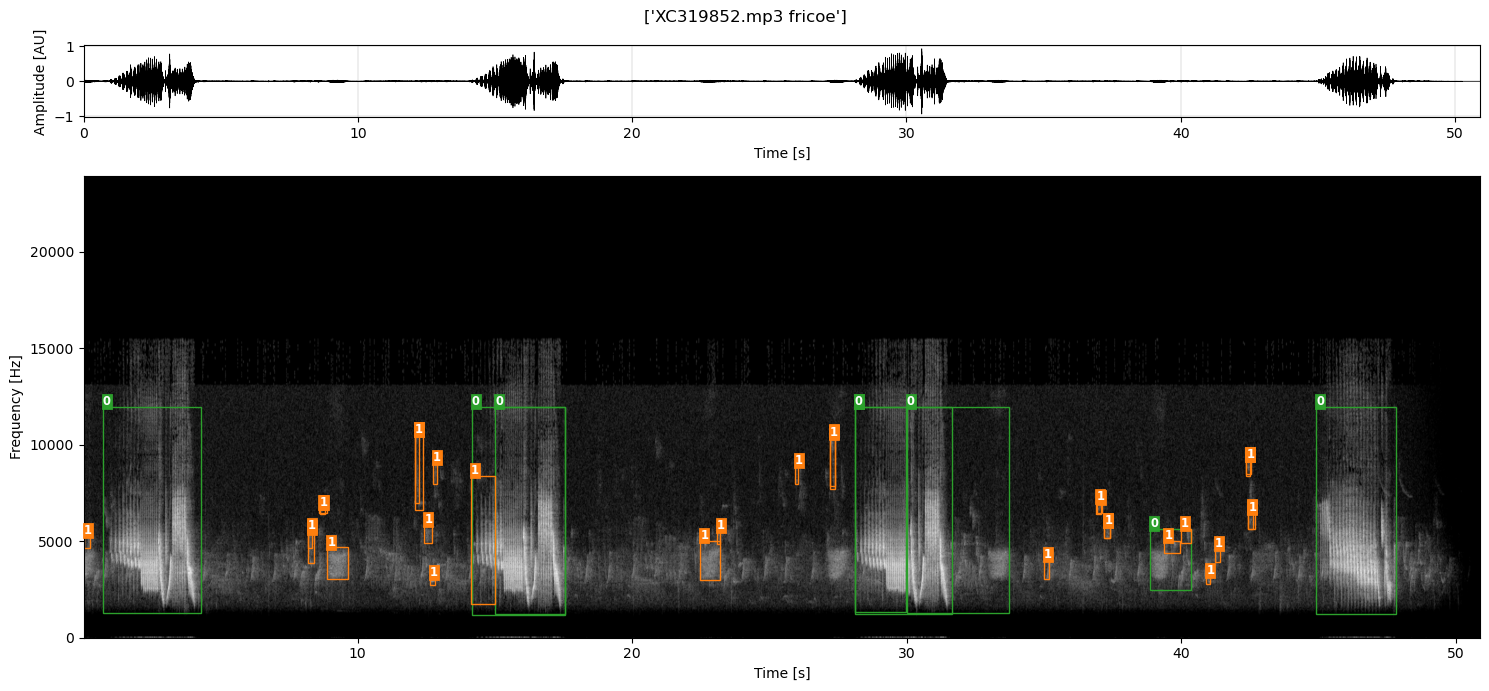

'XC319852.mp3'

In [88]:
# Display the ROIS
# -------------------------------

bambird.overlay_rois(
                    cluster         = df_cluster,
                    params          = params['PARAMS_EXTRACT'],
                    column_labels   = 'cluster_number', #auto_label cluster_number
                    unique_labels   = np.sort(df_cluster.cluster_number.unique()),
                    filename        = None,
                    random_seed     = None,
                    verbose         = True
                    )


In [ ]:
# Remove files
# -------------------------------

if CLEAN :
    shutil.rmtree(TEMP_DIR, ignore_errors=True)